In [1]:
import os
import cv2
import pywt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

In [2]:
emotions = ['normal', 'happy', 'sad', 'surprised']

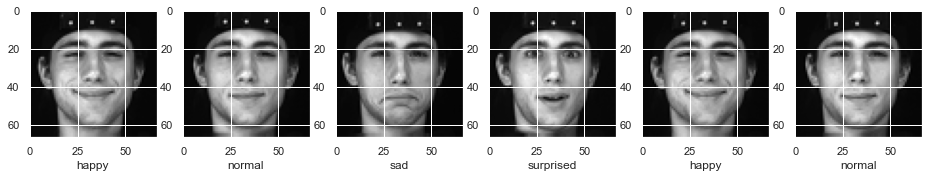

In [3]:
datasets_dir = r'datasets/'

X = []
y = []
i = 1
fig=plt.figure(figsize=(16, 150))
for subdir, dirs, files in os.walk(datasets_dir):
    for filename in files:
        filepath = subdir + os.sep + filename

        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            # Check whether the image has one of the needed emotions
            is_present = False
            for e in emotions:
                if e in filepath:
                    # Read the image and convert it to grayscale
                    image = cv2.imread(filepath)
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    
                    # Apply discrete wavelet transform (2 passes)
                    coeffs2 = pywt.dwt2(gray, 'bior1.3')
                    LL, (LH, HL, HH) = coeffs2
                    coeffs2 = pywt.dwt2(LL, 'bior1.3')
                    LL, (LH, HL, HH) = coeffs2
                    
                    if i < 7:
                        ax = fig.add_subplot(1, 6, i)
                        ax.set_xlabel(e)
                        plt.imshow(LL, cmap='gray')
                        i += 1
                    
                    X.append(LL.flatten())
                    y.append(e)
plt.show()

In [4]:
X = np.asarray(X)
y = np.asarray(y)

X = pd.DataFrame(X)
y = pd.Categorical(y, categories=emotions)

In [5]:
X.shape

(153, 4489)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488
0,24.266602,24.266602,23.447815,23.221252,24.102844,23.984436,23.934753,23.952332,24.543945,24.518250,...,36.197998,37.849548,34.785156,34.225464,35.144409,33.259766,26.273315,22.888977,19.962402,19.962402
1,22.377808,22.377808,23.543762,24.000610,23.723877,24.028870,24.057556,23.768005,25.433533,24.076660,...,38.242249,36.378479,33.503174,32.069153,34.250061,32.848022,24.355347,21.956909,22.860168,22.860168
2,23.939270,23.939270,24.555237,22.917236,24.693909,24.513611,24.957275,24.468323,26.749878,26.231567,...,34.363953,34.129517,33.472229,31.033997,29.949097,28.898438,21.380676,24.130188,23.921021,23.921021
3,23.951721,23.951721,24.569824,23.496948,22.535217,24.550842,24.747192,25.356567,24.964722,25.166504,...,33.798584,31.487061,33.300537,32.300598,23.479004,22.919434,23.464294,22.494324,23.201416,23.201416
4,23.740417,23.740417,24.101013,24.012939,24.024963,23.933533,24.287292,25.269836,23.276001,23.828613,...,38.067383,33.881042,32.360718,30.828369,33.786316,35.325928,30.965088,23.965637,23.058716,23.058716


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [8]:
X_train = X_train.reset_index(drop=True)

df = X_train.join(pd.Series(y_train, name='emotion'))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4480,4481,4482,4483,4484,4485,4486,4487,4488,emotion
0,1020.000000,1020.000000,1020.078552,1019.737305,1018.197876,1018.704102,1020.179260,1018.132263,1064.527222,466.121521,...,463.194702,792.151733,822.014160,885.057556,672.256836,685.113220,831.050537,842.432373,842.432373,surprised
1,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.067871,1022.820557,1027.742310,538.470032,...,875.877075,901.463989,822.323486,873.316711,961.456482,902.130493,898.565063,841.060852,841.060852,surprised
2,814.130493,814.130493,731.410828,619.741638,350.070801,213.236877,228.575928,250.348755,238.920593,209.652588,...,207.357239,158.182739,94.665771,384.865295,450.924683,463.235657,487.044189,510.210510,510.210510,happy
3,20.951721,20.951721,22.663513,23.330200,23.453308,32.227112,28.860596,27.932861,19.934326,20.235168,...,50.951477,47.719910,46.800964,45.627625,50.104309,47.613831,46.071838,49.451660,49.451660,sad
4,411.245728,411.245728,411.695435,413.451050,419.187317,420.610779,417.018738,416.781494,415.133606,420.875610,...,439.199036,335.968445,340.786377,343.334167,345.227539,344.868591,347.705383,352.271790,352.271790,normal


In [9]:
class_feature_means = pd.DataFrame(columns=emotions)

for e, rows in df.groupby('emotion'):
    class_feature_means[e] = rows.mean()

class_feature_means

,normal,happy,sad,surprised
0,506.951904,583.170111,522.421899,525.515174
1,506.951904,583.170111,522.421899,525.515174
2,503.485355,581.385858,524.432898,557.124488
3,492.630169,576.867353,521.024502,555.914376
4,491.121582,567.824453,508.564199,558.836345
...,...,...,...,...
4484,248.015819,334.919855,332.726898,369.181253
4485,250.503786,334.070421,338.093392,372.386459
4486,263.274745,327.026749,335.129197,378.058875
4487,261.680076,321.041506,333.097727,369.060403


In [10]:
within_class_scatter_matrix = np.zeros((4489,4489))
for e, rows in df.groupby('emotion'):
    rows = rows.drop(['emotion'], axis=1)
    s = np.zeros((4489,4489))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(4489,1), class_feature_means[e].values.reshape(4489,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [11]:
feature_means = X_train.mean()
between_class_scatter_matrix = np.zeros((4489,4489))
for e in class_feature_means:    
    n = len(df.loc[df['emotion'] == e].index)
    mc, m = class_feature_means[e].values.reshape(4489,1), feature_means.values.reshape(4489,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [12]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.pinv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [13]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
# for pair in pairs:
#     print(pair[0])

In [14]:
eigen_value_sums = sum(eigen_values)
print('Explained variance')
for i, pair in enumerate(pairs[:4]):
    print(f'Eigenvector {i}: {(pair[0]/eigen_value_sums).real}')
print('...')

Explained variance
Eigenvector 0: 0.6061265222513722
Eigenvector 1: 0.259389183908196
Eigenvector 2: 0.13448429384043162
Eigenvector 3: 1.8921672773345815e-16
...


In [15]:
w_matrix = np.hstack((pairs[0][1].reshape(4489,1), pairs[1][1].reshape(4489,1), pairs[2][1].reshape(4489,1))).real

In [16]:
X_lda = np.array(X_train.dot(w_matrix))

In [17]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

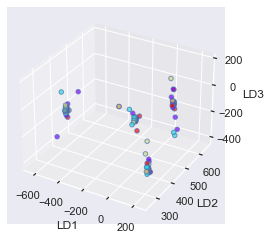

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    xs = X_lda[:,0], 
    ys = X_lda[:,1], 
    zs=X_lda[:,2], 
    c=y_train_encoded, 
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax.set_xlabel("LD1")

ax.set_ylabel("LD2")

ax.set_zlabel("LD3")

plt.show()

In [19]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_lda, y_train)

In [20]:
X_test_lda = np.array(X_test.dot(w_matrix))

In [21]:
accuracy_lin = linear.score(X_test_lda, y_test)

In [22]:
print('Linear kernel accuracy:', accuracy_lin)

Linear kernel accuracy: 0.6774193548387096


In [23]:
yfit = linear.predict(X_test_lda)

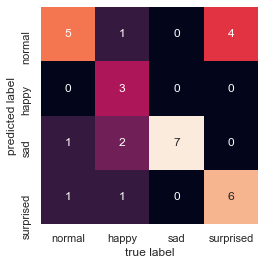

In [24]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=emotions,
            yticklabels=emotions)
plt.xlabel('true label')
plt.ylabel('predicted label')